<a href="https://colab.research.google.com/github/audrey-siqueira/Data-Science-Projects/blob/master/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Classification using Logistic Regression with Kernel PCA**
---
<p align="justify">
A large wine producer has all its types of wines cataloged, registering more than 10 parameters of each wine, from alcohol percentage to color intensity. Based on all parameters the wines are classified between types 1, 2 and 3.The producer wants to create a classification model for new wines based on the catalog already classified from previous wines. Thinking about how to find a solution, the producer hired a Data Science team that quickly thought in a classification model using Logistic Regression.

<p align=center>
<img src="https://drive.google.com/uc?id=1L3c26WhYoAfznH55u0IXy8VWXCGlul7H" width="50%"></p>

<p align="justify">
When the team started to build the prediction model, they realized that if they were able to reduce the 10 parameters of each wine to just 2 parameters, they could illustrate graphically more clearly for the entrepreneur who hired the services and has no knowledge of Data Science.
The difficulty is in how to reduce these parameters and the team decided to use Dimensionality Reduction techniques.

<p align=center>
<img src="https://drive.google.com/uc?id=1G6ET1jvjJ35dw6qch0Wv5ojXRCq6nIs8" width="60%"></p>

The strategy in this case is to use the **Kernel PCA** method to to synthesize the parameters accurately and without losing the original characteristics.


**Code description is explained below:**

## **Importing the libraries**


The 3 libraries needed for the project are imported.
- Pandas for data manipulation and analysis
- Numpy for mathematical operations
- Matplotlib for graphical visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the data set**


The .csv file containing database is imported.

The values of the database header and how they are distributed can be viewed in the image below:

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dimensionality Reduction/Kernel PCA/Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## **Feature Scaling**


Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

## **Splitting the dataset into the Training set and Test set**

The ***sklearn.model_selection*** library was used to divide the database between Training set and Test set. 

X and Y axes values were divided between Training set and Test set, resulting in 4 final vectors:
**X_train**, **X_test** and **Y_train**, **Y_test**

The database was divided in 80% of the total values for Training and 20% of the total values for Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## **Applying Kernel PCA**

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## **Fitting Logistic Regression to the Training Set**

The **sklearn.linear_model** library was used to apply the **Logistic Regression** method.

Using the **Training set** of X and Y values, a prediction curve is created.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Visualising the Training set results**

A graph was plotted with the real values (red and green dots) present in the **Training set**. From these previously mentioned values, the model generated a prediction curve (A vector dividing Red, Green and Blue Background).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


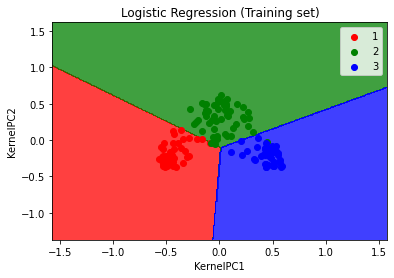

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('KernelPC1')
plt.ylabel('KernelPC2')
plt.legend()
plt.show()

## **Visualising the Test set results**

A graph was plotted with the real values (red and green dots) present in the **Test set**. From these previously mentioned values, the model was compared contrasting with the vector dividing Red and Green Background.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


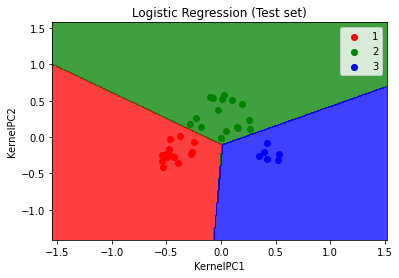

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('KernelPC1')
plt.ylabel('KernelPC2')
plt.legend()
plt.show()

## **Predicting the Results**

In this step was created a vector of predictions using the values of X-axis from **Test set**, based on the regressor generated with the **Training set** in previous step.

Comparing these predictions with the real values of Y-axis in the **Test set**, is possible to calculate the accuracy of the model.

In [ ]:
Y_pred=classifier.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


## **Making the Confusion Matrix**

The confusion matrix is applied to determine the accuracy of the classification model.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## **Conclusion**

The Kernel PCA method proved to be very effective to optimize the accuracy (100%) of Logistic Regression.